In [1]:
import numpy as np
import pandas as pd
import random as rn
import itertools
import time 

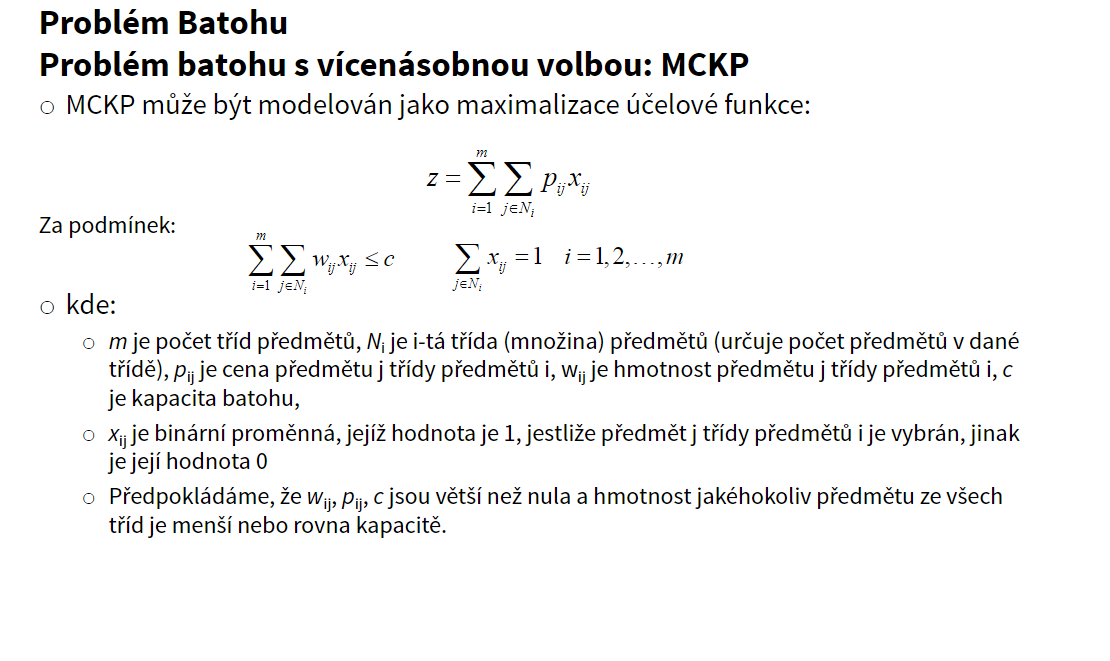

In [2]:
def gen_classes(n_class,n_item):
    classes = [ ]
    for cl in range(n_class):
        item_dic = { }
        for it in range(n_item):
            item_dic.update({it+1:[rn.randint(1,50),rn.randint(1,50)]})
        classes.append(item_dic)
    return classes

def comb_mat(n_class,n_item):
    comb_ls = [ ]
    for cl in range(n_class):
        step = [ ]
        for it in range(n_item):
            step.append(it+1)
        comb_ls.append(step)
    comb_arr = np.array(list(itertools.product(*comb_ls)))
    return comb_arr

def MCKP(n_class,n_item,max_c):
    it_classes = gen_classes(n_class,n_item)
    cb_arr = comb_mat(n_class,n_item)
    print(np.shape(cb_arr))
    res_ls, items_list = [ ], [ ]
    for row in cb_arr:
        row_val,res,cap_check = 0,0,0
        for col_val in row:
            res += it_classes[row_val][col_val][0]
            cap_check += it_classes[row_val][col_val][1]
            row_val += 1
        if cap_check > max_c:
            res_ls.append(n_class*50)
        else:
            res_ls.append(res)
    B_sol = min(res_ls)
    ind = np.argmin(res_ls)
    items = cb_arr[ind]
    for i in range(n_class):
        items_list.append(it_classes[i][items[i]])
    return B_sol, items_list, items

In [3]:
start_time = time.time()
solution, it_list, items = MCKP(5,3,100)
print('%s sec'%(time.time()-start_time))

(243, 5)
0.0010001659393310547 sec


# Nedoporučuji pouštet znova 

In [4]:
start_time = time.time()
solution_time, it_list_time, items_time = MCKP(10,6,100)
print('%s sec'%(time.time()-start_time))

(60466176, 10)
342.23134541511536 sec


# --------------------------------------

# visualization of results

In [5]:
def viz_res(solution,it_list, items):
    class_n = [0]*5
    class_n = [i+1 for i in range(5)]
    columns_names = ['Class','Id','Capacity','Price']
    sorted_ls_ns = [ ]
    c_sum = 0
    for i in range(len(items)):
        sorted_ls = [ ]
        sorted_ls.append(class_n[i])
        sorted_ls.append(items[i])
        sorted_ls.append(it_list[i][1])
        sorted_ls.append(it_list[i][0])
        c_sum += it_list[i][1]
        sorted_ls_ns.append(sorted_ls)
    sorted_ls_ns.append(['','Sum',c_sum,solution])
    DF = pd.DataFrame(sorted_ls_ns)
    DF.columns = columns_names
    return DF

In [6]:
df = viz_res(solution,it_list,items)
df

,Class,Id,Capacity,Price
0,1,1,3,6
1,2,2,29,7
2,3,1,28,5
3,4,3,18,22
4,5,2,5,8
5,,Sum,83,48
